## INTENTO 16

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib as plt
import shap

c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df4 = pd.read_csv('../df_cleaned.csv')

In [3]:
dfbesttry = pd.read_csv('../Nacho/try11_data.csv')

In [4]:
df4.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df4

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,179,54,1,4,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,NaN,NaN,NaN
912,180,55,1,2,110.0,214.0,1.0,1.0,180.0,0.0,NaN,NaN,NaN,NaN,NaN
913,181,67,1,3,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,NaN
914,182,59,1,1,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,NaN


In [6]:
df4.drop('index', axis=1, inplace=True)

In [7]:
df4.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [8]:
media_thalach = df4['thalach'].mean()

# Rellenar los NaN con la media calculada
df4['thalach'].fillna(value=media_thalach, inplace=True)

# Mostrar los primeros registros para verificar el resultado
print(df4[['thalach']].head())

   thalach
0    125.0
1    150.0
2    149.0
3    140.0
4    111.0


In [9]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df4.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['age', 'oldpeak']
categorical_cols4 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'label']

# Imputación para variables numéricas (usando la mediana)
numeric_imputer3 = SimpleImputer(strategy='mean')
df4[numeric_cols4] = numeric_imputer3.fit_transform(df4[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df4[categorical_cols4] = categorical_imputer3.fit_transform(df4[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df4.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal        483
label         0
dtype: int64


In [10]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor <= 239:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df4['chol'] = df4['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df4['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [11]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df4['thal'] = df4['thal'].apply(sust_thal)
print(df4['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [12]:
def categorizar_trestbps(valor):
    if pd.isnull(valor):
        return 0
    elif valor < 120:
        return 1
    elif 120 <= valor <= 129:
        return 2
    else:  # valor >= 130
        return 3


df4['trestbps'] = df4['trestbps'].apply(categorizar_trestbps)

# Mostrar los primeros registros para verificar el resultado
print(df4['trestbps'].head())


0    2
1    2
2    3
3    3
4    3
Name: trestbps, dtype: int64


In [13]:
df4.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64

In [14]:
from sklearn.preprocessing import RobustScaler

# Crear un objeto StandardScaler
scaler3 = RobustScaler()

# # Lista de columnas a estandarizar
columns_to_scale3 = ['age','oldpeak', 'thalach']

# # Ajustar el escalador solo a las columnas especificadas y transformarlas
df4[columns_to_scale3] = scaler3.fit_transform(df4[columns_to_scale3])


In [15]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["slope", "ca", "thal", "restecg"]

# Aplicar codificación ordinal
df4[ordinal_vars] = ordinal_encoder.fit_transform(df4[ordinal_vars])

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,-0.230769,1.0,1.0,2,2,0.0,2.0,-0.361111,1.0,0.400000,0.0,1.0,1.0,0.0
1,0.000000,1.0,3.0,2,2,0.0,0.0,0.333333,1.0,0.466667,1.0,0.0,3.0,2.0
2,0.692308,1.0,4.0,3,0,0.0,2.0,0.305556,0.0,0.800000,0.0,0.0,0.0,2.0
3,-0.153846,0.0,2.0,3,0,0.0,0.0,0.055556,0.0,-0.533333,1.0,0.0,0.0,0.0
4,0.076923,1.0,4.0,3,2,0.0,0.0,-0.750000,1.0,3.200000,2.0,0.0,3.0,3.0


In [16]:
# Aplicar codificación de conteo
for var in ["chol","trestbps", "cp"]:
    df4[var + '_count'] = df4[var].map(df4[var].value_counts())

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,chol_count,trestbps_count,cp_count
0,-0.230769,1.0,1.0,2,2,0.0,2.0,-0.361111,1.0,0.400000,0.0,1.0,1.0,0.0,230,211,44
1,0.000000,1.0,3.0,2,2,0.0,0.0,0.333333,1.0,0.466667,1.0,0.0,3.0,2.0,230,211,204
2,0.692308,1.0,4.0,3,0,0.0,2.0,0.305556,0.0,0.800000,0.0,0.0,0.0,2.0,201,485,495
3,-0.153846,0.0,2.0,3,0,0.0,0.0,0.055556,0.0,-0.533333,1.0,0.0,0.0,0.0,201,485,173
4,0.076923,1.0,4.0,3,2,0.0,0.0,-0.750000,1.0,3.200000,2.0,0.0,3.0,3.0,230,485,495


In [17]:
df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,chol_count,trestbps_count,cp_count
0,-0.230769,1.0,1.0,2,2,0.0,2.0,-0.361111,1.0,0.400000,0.0,1.0,1.0,0.0,230,211,44
1,0.000000,1.0,3.0,2,2,0.0,0.0,0.333333,1.0,0.466667,1.0,0.0,3.0,2.0,230,211,204
2,0.692308,1.0,4.0,3,0,0.0,2.0,0.305556,0.0,0.800000,0.0,0.0,0.0,2.0,201,485,495
3,-0.153846,0.0,2.0,3,0,0.0,0.0,0.055556,0.0,-0.533333,1.0,0.0,0.0,0.0,201,485,173
4,0.076923,1.0,4.0,3,2,0.0,0.0,-0.750000,1.0,3.200000,2.0,0.0,3.0,3.0,230,485,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.000000,1.0,4.0,3,1,0.0,0.0,0.111111,1.0,0.800000,1.0,0.0,0.0,0.0,128,485,495
912,0.076923,1.0,2.0,1,2,1.0,1.0,1.166667,0.0,0.050585,1.0,0.0,0.0,0.0,230,161,173
913,1.000000,1.0,3.0,3,2,0.0,2.0,0.333333,0.0,0.000000,1.0,0.0,3.0,0.0,230,485,204
914,0.384615,1.0,1.0,3,3,0.0,2.0,0.583333,0.0,-0.400000,1.0,0.0,3.0,0.0,357,485,44


In [18]:
train_end4 = df4[0:732]
test_end4 = df4[(916-184):]

In [19]:
train_end4.isna().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
label             0
chol_count        0
trestbps_count    0
cp_count          0
dtype: int64

In [20]:
test_end4.isna().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
label             0
chol_count        0
trestbps_count    0
cp_count          0
dtype: int64

In [21]:
train_end4['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X4 = train_end4.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y4 = train_end4['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X4_train, X4_val, Y4_train, Y4_val = train_test_split(X4, Y4, test_size=0.125, random_state=42)



In [23]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define los hiperparámetros que deseas ajustar
param_grid = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [30, 50, 100],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Inicializa el modelo CatBoost
cb_model = CatBoostClassifier(verbose=False, loss_function='MultiClass')

# Inicializa GridSearchCV
grid_search = GridSearchCV(estimator=cb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Ajusta GridSearchCV en los datos de entrenamiento
grid_search.fit(X4_train, Y4_train)

# Obtén los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrena un nuevo modelo con los mejores hiperparámetros
best_cb_model = CatBoostClassifier(**best_params)
best_cb_model.fit(X4_train, Y4_train)

# Evalúa el modelo
predictions = best_cb_model.predict(X4_val)
accuracy = accuracy_score(Y4_val, predictions)
print(f"La precisión del modelo CatBoost en el conjunto de validación con los mejores hiperparámetros es: {accuracy}")


Mejores hiperparámetros: {'depth': 10, 'iterations': 30, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
0:	learn: 1.5481514	total: 23.8ms	remaining: 689ms
1:	learn: 1.4954170	total: 31.5ms	remaining: 441ms
2:	learn: 1.4583163	total: 57.2ms	remaining: 515ms
3:	learn: 1.4227702	total: 82ms	remaining: 533ms
4:	learn: 1.3930807	total: 109ms	remaining: 543ms
5:	learn: 1.3619242	total: 134ms	remaining: 535ms
6:	learn: 1.3204865	total: 158ms	remaining: 520ms
7:	learn: 1.2906986	total: 185ms	remaining: 508ms
8:	learn: 1.2609453	total: 211ms	remaining: 493ms
9:	learn: 1.2271688	total: 214ms	remaining: 429ms
10:	learn: 1.2013800	total: 239ms	remaining: 413ms
11:	learn: 1.1780036	total: 261ms	remaining: 391ms
12:	learn: 1.1567764	total: 284ms	remaining: 371ms
13:	learn: 1.1377898	total: 309ms	remaining: 353ms
14:	learn: 1.1159206	total: 331ms	remaining: 331ms
15:	learn: 1.0926952	total: 343ms	remaining: 300ms
16:	learn: 1.0739107	total: 364ms	remaining: 278ms
17:	learn: 1.0569801	total: 385ms	remaining:

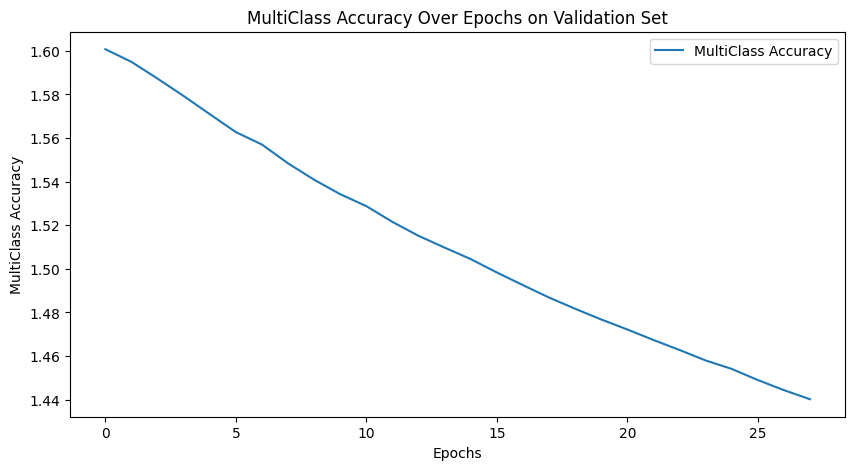

In [24]:
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt


# Definir los mejores hiperparámetros obtenidos de la búsqueda en cuadrícula
best_hyperparams = {'depth': 8, 'iterations': 28, 'l2_leaf_reg': 1, 'learning_rate': 0.01}

# Inicializar el modelo CatBoost con los mejores hiperparámetros
best_cb_model = CatBoostClassifier(**best_hyperparams,verbose=False)

# Entrenar el modelo con los datos de entrenamiento
best_cb_model.fit(X4_train, Y4_train, verbose=False)

# Entrenar el modelo con los datos de entrenamiento y evaluar en el conjunto de validación
# Asegúrate de habilitar el registro de la métrica de evaluación
best_cb_model.fit(X4_train, Y4_train, eval_set=(X4_val, Y4_val), verbose=False, plot=False)

# CatBoost permite acceder al registro de métricas de evaluación a través del objeto del modelo
# Acceder a las métricas de evaluación
eval_metrics = best_cb_model.get_evals_result()

# Ajustar el nombre de la clave para acceder a la métrica 'MultiClass' en el conjunto de validación
epochs = range(len(eval_metrics['validation']['MultiClass']))
accuracy = eval_metrics['validation']['MultiClass']

# Crear un gráfico de la métrica a lo largo de las iteraciones de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, label='MultiClass Accuracy')
plt.xlabel('Epochs')
plt.ylabel('MultiClass Accuracy')
plt.title('MultiClass Accuracy Over Epochs on Validation Set')
plt.legend()
plt.show()


In [25]:
# Asumiendo que 'best_cb_model' es tu modelo entrenado

# Obtener la importancia de las características
feature_importances = best_cb_model.get_feature_importance()

# Obtener los nombres de las características
feature_names = X4_train.columns

# Crear un DataFrame para visualizar mejor la importancia de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia de manera descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame
print(importance_df)


           Feature  Importance
9          oldpeak   14.644788
2               cp   12.610199
15        cp_count   11.675755
12            thal    8.992267
4             chol    7.239323
0              age    6.515020
7          thalach    6.283544
8            exang    5.392737
3         trestbps    5.390253
6          restecg    4.670226
13      chol_count    4.085379
14  trestbps_count    3.935279
11              ca    2.825368
1              sex    2.575655
5              fbs    1.598787
10           slope    1.565420


In [26]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y4_val_pred = best_cb_model.predict(X4_val)

# Calcular la precisión
accuracy = accuracy_score(Y4_val, Y4_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.5108695652173914


In [27]:
# Excluyendo la columna 'label'
test_end4_sin_label = test_end4.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = best_cb_model.predict(test_end4_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = best_cb_model.predict_proba(test_end4_sin_label)



In [28]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df4 = test_end4.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df4['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df4.head())



          age  sex   cp  trestbps  chol  fbs  restecg   thalach  exang  \
732  0.230769  1.0  4.0         3     1  0.0      2.0 -0.527778    1.0   
733 -0.153846  1.0  2.0         3     1  0.0      0.0  0.750000    0.0   
734 -0.461538  1.0  2.0         1     0  0.0      0.0 -1.055556    0.0   
735  0.615385  1.0  4.0         1     0  0.0      0.0 -0.277778    1.0   
736 -0.230769  1.0  3.0         1     1  0.0      0.0 -0.416667    0.0   

      oldpeak  slope   ca  thal  label  chol_count  trestbps_count  cp_count  
732  1.466667    2.0  0.0   0.0    2.0         128             485       495  
733 -0.533333    1.0  0.0   0.0    0.0         128             485       173  
734 -0.533333    1.0  0.0   0.0    0.0         201             161       173  
735  1.133333    2.0  0.0   0.0    1.0         201             161       495  
736 -0.133333    0.0  0.0   1.0    0.0         128             161       204  


In [29]:
predicted_df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,chol_count,trestbps_count,cp_count
732,0.230769,1.0,4.0,3,1,0.0,2.0,-0.527778,1.0,1.466667,2.0,0.0,0.0,2.0,128,485,495
733,-0.153846,1.0,2.0,3,1,0.0,0.0,0.750000,0.0,-0.533333,1.0,0.0,0.0,0.0,128,485,173
734,-0.461538,1.0,2.0,1,0,0.0,0.0,-1.055556,0.0,-0.533333,1.0,0.0,0.0,0.0,201,161,173
735,0.615385,1.0,4.0,1,0,0.0,0.0,-0.277778,1.0,1.133333,2.0,0.0,0.0,1.0,201,161,495
736,-0.230769,1.0,3.0,1,1,0.0,0.0,-0.416667,0.0,-0.133333,0.0,0.0,1.0,0.0,128,161,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.000000,1.0,4.0,3,1,0.0,0.0,0.111111,1.0,0.800000,1.0,0.0,0.0,2.0,128,485,495
912,0.076923,1.0,2.0,1,2,1.0,1.0,1.166667,0.0,0.050585,1.0,0.0,0.0,0.0,230,161,173
913,1.000000,1.0,3.0,3,2,0.0,2.0,0.333333,0.0,0.000000,1.0,0.0,3.0,0.0,230,485,204
914,0.384615,1.0,1.0,3,3,0.0,2.0,0.583333,0.0,-0.400000,1.0,0.0,3.0,0.0,357,485,44


In [30]:
predicted_df4['label'].value_counts()

0.0    110
1.0     41
2.0     24
3.0      9
Name: label, dtype: int64

In [31]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df4.reset_index(drop=True, inplace=True)
predicted_df4['ID'] = predicted_df4.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df4[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try58_data.csv', index=False)


In [32]:
df55best = pd.read_csv('try56best_data.csv')
dfactualtry = pd.read_csv('try58_data.csv')

In [33]:
difference = df55best['label'].compare(dfactualtry['label'])
difference = difference[difference['self']!= difference ['other']]

print(difference)

     self  other
22    1.0    2.0
52    1.0    0.0
53    1.0    0.0
134   2.0    0.0
155   1.0    2.0
160   2.0    0.0


In [34]:
total_diferencias = len(difference)

print(f"Total de entradas diferentes: {total_diferencias}")

Total de entradas diferentes: 6
